In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/pdcg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
z = np.array([1.61, 2.0])
x = 0.75
rhrt1 = np.array([0.145, 0.22])
n1 = np.array([15000., 1000.])
gammac = np.array([0.11, 0.02])

@np.vectorize
def pfact(rhrt, n, i):
    return (rhrt/rhrt1[i])**z[i] * ((n*np.log(gammac[i]*n1[i]))/(n1[i]*np.log(gammac[i]*n)))**(1.-x)

def escapers_rate(pfactor):
   return 0.0142*(1-pfactor) + 0.6*0.1*pfactor

In [3]:
rhrt = np.logspace(-2,0,100)
n = np.logspace(3,6,100)

xx, yy = np.meshgrid(rhrt, n, sparse=True)

pfact_eq_mass = pfact(xx, yy,0)
pfact_eq_mass[pfact_eq_mass>1.]=1.
xi_eq = escapers_rate(pfact_eq_mass)

pfact_mt_mass = pfact(xx, yy,1)
pfact_mt_mass[pfact_mt_mass>1.]=1.
xi_mt = escapers_rate(pfact_mt_mass)

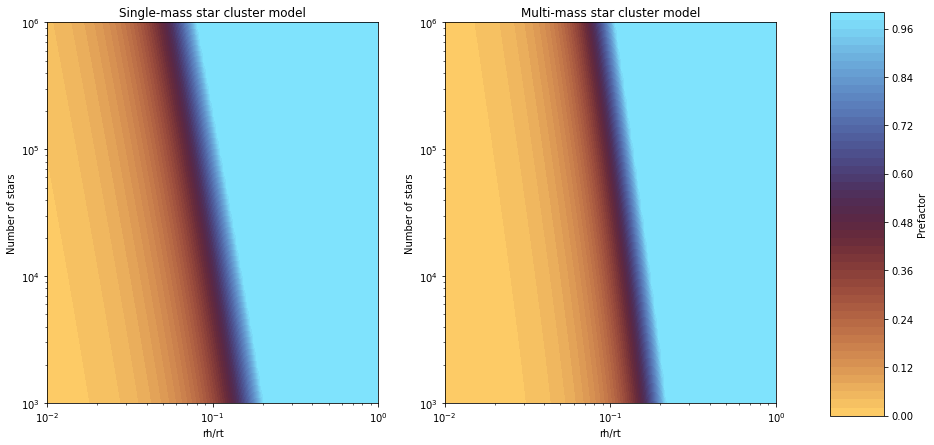

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
h = ax[0].contourf(rhrt, n, pfact_eq_mass, levels=50, cmap='managua')
ax[0].set(xscale='log', yscale='log', xlabel='rh/rt', ylabel='Number of stars', title='Single-mass star cluster model')
h = ax[1].contourf(rhrt, n, pfact_mt_mass, levels=50, cmap='managua')
ax[1].set(xscale='log', yscale='log', xlabel='rh/rt', ylabel='Number of stars', title='Multi-mass star cluster model')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(h, cax=cbar_ax, label='Prefactor')

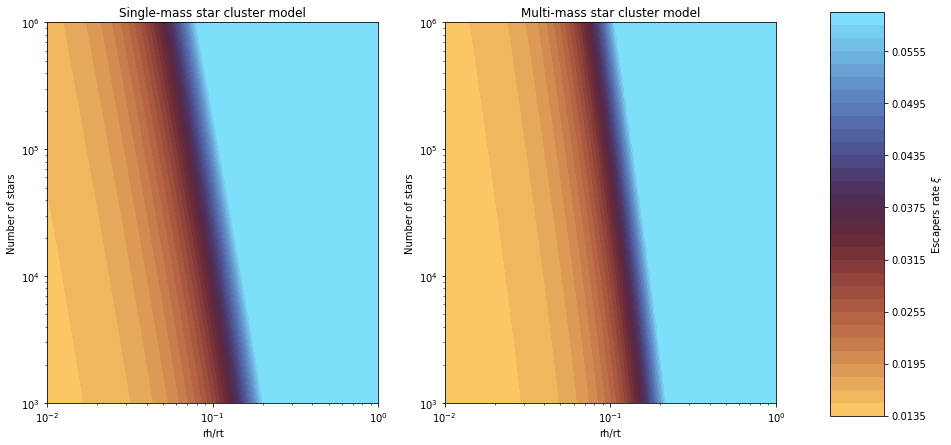

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
h = ax[0].contourf(rhrt, n, xi_eq, levels=30, cmap='managua')
ax[0].set(xscale='log', yscale='log', xlabel='rh/rt', ylabel='Number of stars', title='Single-mass star cluster model')
h = ax[1].contourf(rhrt, n, xi_mt, levels=30, cmap='managua')
ax[1].set(xscale='log', yscale='log', xlabel='rh/rt', ylabel='Number of stars', title='Multi-mass star cluster model')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(h, cax=cbar_ax, label=r'Escapers rate $\xi$')

rh = 4.00 pc


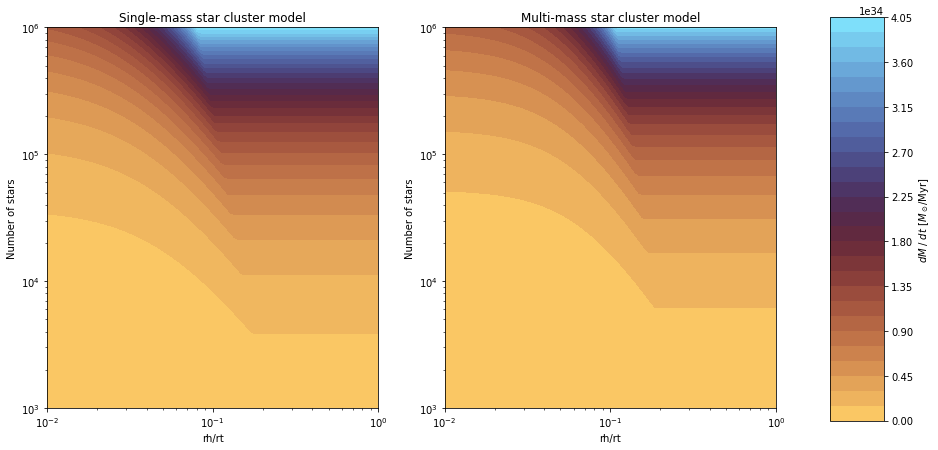

In [8]:
G_const_cgs = 6.6738e-8  # cm^3 g^-1 s^-2
Msun_g = 1.989e33  # g
pc_cm = 3.085678e18  # cm
myr = 3.15576e13  # s

rh = 4. * pc_cm
m_mean = 0.67*Msun_g


dmdt_eq = m_mean * yy* (xi_eq * (G_const_cgs * m_mean)**0.5 * np.log(gammac[0]*yy) / (0.138 * yy**0.5 * rh**1.5)) * myr
dmdt_mt = m_mean * yy* (xi_mt * (G_const_cgs * m_mean)**0.5 * np.log(gammac[1]*yy) / (0.138 * yy**0.5 * rh**1.5)) * myr

print(f"rh = {rh/pc_cm:.2f} pc")
fig, ax = plt.subplots(1,2, figsize=(15,7))
h = ax[0].contourf(rhrt, n, dmdt_eq, levels=30, cmap='managua')
ax[0].set(xscale='log', yscale='log', xlabel='rh/rt', ylabel='Number of stars', title='Single-mass star cluster model')
h = ax[1].contourf(rhrt, n, dmdt_mt, levels=30, cmap='managua')
ax[1].set(xscale='log', yscale='log', xlabel='rh/rt', ylabel='Number of stars', title='Multi-mass star cluster model')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(h, cax=cbar_ax, label=r'$d M \; / \; dt$ [$M_\odot$/Myr]')
plt.show()

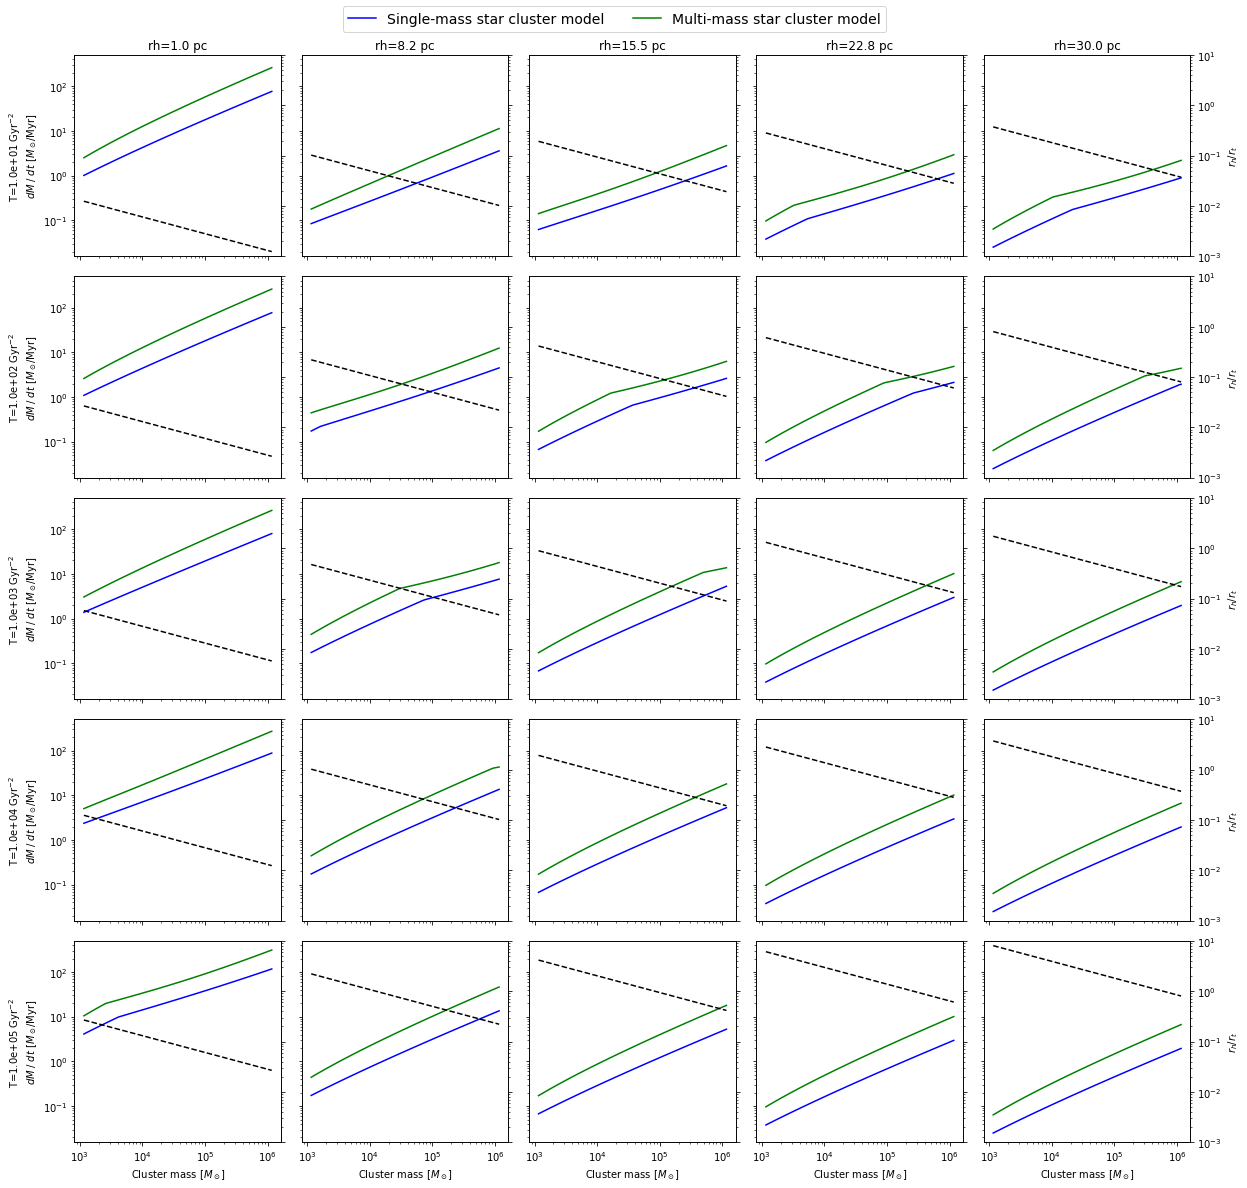

In [11]:
clus_m = 1.16 * n * Msun_g
T_str = np.logspace(1, 5, 5) / (1e3*myr)**2 # in s^-2
rh_m = np.linspace(1., 30., 5) * pc_cm

handles, labels = [], []
fig, ax = plt.subplots(5, 5, figsize=(20,20), sharex=True, sharey=True)
for j in range(5):
    for k in range(5):
        axr = ax[j,k].twinx()
        T = T_str[j]
        rh = rh_m[k]
        rt = (G_const_cgs * clus_m / T)**(1./3.)
        rhrt_i = rh / rt
        for i in range(2):
            pfact_i = pfact(rhrt_i, n, i)
            pfact_i[pfact_i>1.] = 1.
            xi_i = escapers_rate(pfact_i)
            if i==0:
                psi = 1.
            else:
                psi = 4.
            t_rh_i = 0.138 * n**0.5 * rh**1.5 / ((G_const_cgs * m_mean)**0.5 * np.log(gammac[i]*n)) / psi
            dmdt_i = (clus_m * xi_i / t_rh_i)/(Msun_g/myr)
            ax[j,k].plot(clus_m/Msun_g, dmdt_i, label='Single-mass star cluster model' if i==0 else 'Multi-mass star cluster model'
                         , color='b' if i==0 else 'g')
        axr.plot(clus_m/Msun_g, rhrt_i, linestyle='--', color='k')
        axr.set(yscale='log', ylim=(1e-3, 1e1))
        ax[j,k].set(xscale='log', yscale='log')
        h, l = ax[j,k].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
        if k==0:
            ax[j,k].set_ylabel(f'T={T*(1e3*myr)**2:.1e} Gyr$^{{-2}}$'+'\n'+r'$d M \; / \; dt$ [$M_\odot$/Myr]')
        if k==4:
            axr.set_ylabel(r'$r_h/r_t$')
        else:
            axr.set_yticklabels([])
        
        if j==0:
            ax[j,k].set_title(f'rh={rh/pc_cm:.1f} pc')
        if j==4:
            ax[j,k].set_xlabel('Cluster mass [$M_\\odot$]')

plt.subplots_adjust(hspace=0.1, wspace=0.1)
# Remove duplicate labels
unique = dict(zip(labels, handles))
fig.legend(unique.values(), unique.keys(), loc='center', bbox_to_anchor=(0.5, 0.905), ncols=2, fontsize=14, frameon=True)
plt.show()

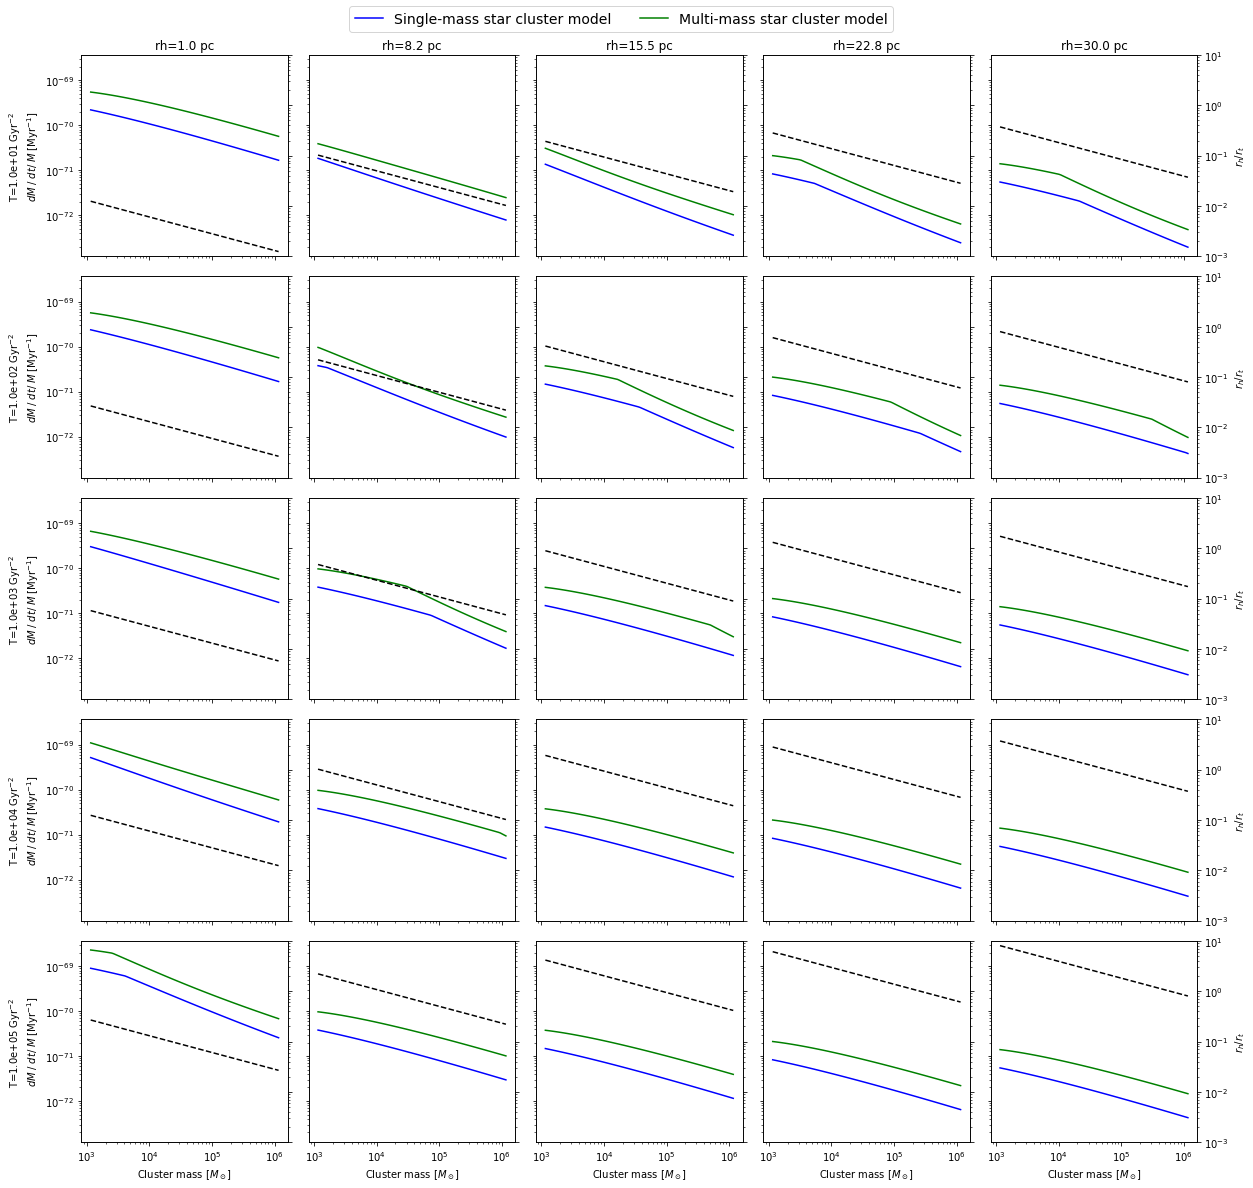

In [12]:
clus_m = 1.16 * n * Msun_g
T_str = np.logspace(1, 5, 5) / (1e3*myr)**2 # in s^-2
rh_m = np.linspace(1., 30., 5) * pc_cm

handles, labels = [], []
fig, ax = plt.subplots(5, 5, figsize=(20,20), sharex=True, sharey=True)
for j in range(5):
    for k in range(5):
        axr = ax[j,k].twinx()
        T = T_str[j]
        rh = rh_m[k]
        rt = (G_const_cgs * clus_m / T)**(1./3.)
        rhrt_i = rh / rt
        for i in range(2):
            pfact_i = pfact(rhrt_i, n, i)
            pfact_i[pfact_i>1.] = 1.
            xi_i = escapers_rate(pfact_i)
            if i==0:
                psi = 1.
            else:
                psi = 4.
            t_rh_i = 0.138 * n**0.5 * rh**1.5 / ((G_const_cgs * m_mean)**0.5 * np.log(gammac[i]*n)) / psi
            dmdt_i = (clus_m * xi_i / t_rh_i)/(Msun_g/myr)
            ax[j,k].plot(clus_m/Msun_g, dmdt_i/clus_m/Msun_g, label='Single-mass star cluster model' if i==0 else 'Multi-mass star cluster model'
                         , color='b' if i==0 else 'g')
        axr.plot(clus_m/Msun_g, rhrt_i, linestyle='--', color='k')
        axr.set(yscale='log', ylim=(1e-3, 1e1))
        ax[j,k].set(xscale='log', yscale='log')
        h, l = ax[j,k].get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
        if k==0:
            ax[j,k].set_ylabel(f'T={T*(1e3*myr)**2:.1e} Gyr$^{{-2}}$'+'\n'+r'$d M \; / \; dt / \; M$ [Myr$^{-1}$]')
        if k==4:
            axr.set_ylabel(r'$r_h/r_t$')
        else:
            axr.set_yticklabels([])
        
        if j==0:
            ax[j,k].set_title(f'rh={rh/pc_cm:.1f} pc')
        if j==4:
            ax[j,k].set_xlabel('Cluster mass [$M_\\odot$]')

plt.subplots_adjust(hspace=0.1, wspace=0.1)
# Remove duplicate labels
unique = dict(zip(labels, handles))
fig.legend(unique.values(), unique.keys(), loc='center', bbox_to_anchor=(0.5, 0.905), ncols=2, fontsize=14, frameon=True)
plt.show()